**미니프로젝트**
### **VOC를 제기한 고객의 <span style="color:darkgreen">해지 여부</span> 예측 문제**
---

#### **<span style="color:red">[미션 안내]</span>**
* VOC를 제기한 고객의 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 해지 여부를 예측하고 결과를 분석하세요.

In [1]:
# 코드실행시 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

<br>

In [2]:
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/mini_proj5/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>

## 데이터 불러오기

In [5]:
df = pd.read_csv(path+"voc_data.csv")

<br>

## 데이터 확인

In [6]:
df.head()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,_,1000665328,2153,10009,10002,_,F,1000001126,36,10001,...,0,_,10001,_,_,99991231,N,_,0,N
1,_,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,_,1001028567,1575,10009,10002,_,G,1000851875,52,10001,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,10000,1000665328,3546,10009,10002,_,_,1000001126,_,10001,...,0,_,10001,_,_,99991231,N,_,0,N
4,_,1000779276,3086,10009,10002,_,G,1000764639,50,10001,...,0,_,10001,_,_,99991231,N,_,0,N


In [7]:
df.tail()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
9995,_,1000811136,2123,10009,10002,_,G,1000809259,17,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9996,_,1001047799,2153,10009,10002,_,I,1001046521,35,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9997,_,1001027819,379,10009,10002,_,G,1000720809,51,10001,...,0,10270,10001,15097,15244,20180903,N,N,0,N
9998,_,1001027819,314,10009,10002,_,I,1000720809,_,10001,...,0,_,10001,15097,15244,20210412,N,_,0,N
9999,_,1001047802,2266,10009,10002,_,G,1001046524,27,10001,...,0,_,10001,_,_,99991231,N,_,0,N


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_trt_perd_itg_cd             10000 non-null  object
 1   voc_prod_sbt_id                 10000 non-null  int64 
 2   voc_wjt_sorc_id                 10000 non-null  int64 
 3   voc_type_itg_cd                 10000 non-null  int64 
 4   voc_sttus_itg_cd                10000 non-null  int64 
 5   voc_trt_reslt_itg_cd            10000 non-null  object
 6   cust_clas_itg_cd                10000 non-null  object
 7   bprod_sbt_id                    10000 non-null  int64 
 8   age_itg_cd                      10000 non-null  object
 9   cont_sttus_itg_cd               10000 non-null  object
 10  new_date                        10000 non-null  int64 
 11  opn_nfl_chg_date                10000 non-null  int64 
 12  cust_dtl_ctg_itg_cd             10000 non-null 

In [9]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
df.columns

Index(['voc_trt_perd_itg_cd', 'voc_prod_sbt_id', 'voc_wjt_sorc_id',
       'voc_type_itg_cd', 'voc_sttus_itg_cd', 'voc_trt_reslt_itg_cd',
       'cust_clas_itg_cd', 'bprod_sbt_id', 'age_itg_cd', 'cont_sttus_itg_cd',
       'new_date', 'opn_nfl_chg_date', 'cust_dtl_ctg_itg_cd',
       'voc_trt_degr_div_itg_cd', 'voc_dupl_tmscnt', 'oos_cause_type_itg_cd',
       'voc_trt_need_time_itg_cd', 'engt_cperd_type_itg_cd',
       'engt_tgt_div_itg_cd', 'cont_fns_pam_date', 'voc_mis_pbls_yn',
       'fclt_oos_yn', 'cust_snsry_base_conf_need_time', 'trm_yn'],
      dtype='object')

In [11]:
df.values

array([['_', 1000665328, 2153, ..., '_', 0, 'N'],
       ['_', 1001028714, 3311, ..., '_', 0, 'N'],
       ['_', 1001028567, 1575, ..., 'N', 0, 'N'],
       ...,
       ['_', 1001027819, 379, ..., 'N', 0, 'N'],
       ['_', 1001027819, 314, ..., '_', 0, 'N'],
       ['_', 1001047802, 2266, ..., '_', 0, 'N']], dtype=object)

In [12]:
df.describe()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
count,1.000000e+04,10000.00000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000
mean,9.907267e+08,1578.29170,10008.52360,10002.043400,8.838173e+08,1.744283e+07,1.744505e+07,20001.074200,0.008800,10002.656800,7.004469e+07,193.88010
std,1.005780e+08,1078.63717,1.57927,0.314843,3.214229e+08,6.849207e+06,6.850077e+06,0.262109,0.103555,6.576864,3.863802e+07,6970.03853
min,-9.980000e+02,126.00000,10003.00000,10002.000000,-9.980000e+02,1.010100e+04,1.010100e+04,20001.000000,0.000000,10001.000000,2.001063e+07,0.00000
25%,1.000782e+09,360.00000,10009.00000,10002.000000,1.000003e+09,2.008053e+07,2.008123e+07,20001.000000,0.000000,10001.000000,2.021102e+07,0.00000
50%,1.001028e+09,2056.00000,10009.00000,10002.000000,1.000749e+09,2.014121e+07,2.015031e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
75%,1.001036e+09,2153.00000,10009.00000,10002.000000,1.001044e+09,2.018010e+07,2.018032e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
max,1.001079e+09,3856.00000,10017.00000,10005.000000,1.001078e+09,2.020041e+07,2.020041e+07,20002.000000,3.000000,10038.000000,9.999123e+07,367991.00000


In [13]:
df.isnull().sum()

,0
voc_trt_perd_itg_cd,0
voc_prod_sbt_id,0
voc_wjt_sorc_id,0
voc_type_itg_cd,0
voc_sttus_itg_cd,0
voc_trt_reslt_itg_cd,0
cust_clas_itg_cd,0
bprod_sbt_id,0
age_itg_cd,0
cont_sttus_itg_cd,0


In [14]:
df['voc_trt_perd_itg_cd']

,voc_trt_perd_itg_cd
0,_
1,_
2,_
3,10000
4,_
...,...
9995,_
9996,_
9997,_
9998,_


In [15]:
df['voc_trt_perd_itg_cd'].value_counts()

,count
voc_trt_perd_itg_cd,
_,5422
10000,4283
10001,163
10002,58
10003,25
10004,16
10005,10
10006,6
10008,3


### 컬럼에서  '_' 값이 차지하는 비율
- voc_trt_perd_itg_cd : 0.54
- voc_trt_reslt_itg_cd : 0.88
- oos_cause_type_itg_cd : 0.9
- engt_cperd_type_itg_cd : 0.63
- engt_tgt_div_itg_cd : 0.63
- fclt_oos_yn : 0.90  
- cust_clas_itg_cd : 0.2
- age_itg_cd : 0.22
- cont_sttus_itg_cd : 0.11
- cust_dtl_ctg_itg_cd : 0.11
- voc_mis_pbls_yn : 0.008


## 데이터 결측치 처리

In [16]:
underscore_ratio = (df['voc_trt_perd_itg_cd'] == '_').mean()

if underscore_ratio > 0.5:
    df1 = df.drop(['voc_trt_perd_itg_cd'], axis=1)

In [17]:
cols = df1.columns[(df1 == '_').mean() > 0.5]
df1 = df1.drop(cols, axis=1)

In [18]:
cols

Index(['voc_trt_reslt_itg_cd', 'oos_cause_type_itg_cd',
       'engt_cperd_type_itg_cd', 'engt_tgt_div_itg_cd', 'fclt_oos_yn'],
      dtype='object')

In [19]:
df1['cust_clas_itg_cd'].value_counts()

,count
cust_clas_itg_cd,
L,2769
_,1934
G,1777
I,1266
J,1071
F,903
O,275
H,4
M,1


In [20]:
(df1['cust_clas_itg_cd']=='_').sum()

1934

In [21]:
df2 = df1.replace('_', pd.NA)
# df2 = df1.replace('_', np.nan)

In [22]:
df2

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,opn_nfl_chg_date,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,19881005,19881005,10003,20001,0,10001,99991231,N,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,20130817,20130817,10002,20001,0,10001,20220319,N,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,20190509,20190509,10003,20001,0,10001,20220508,N,0,N
3,1000665328,3546,10009,10002,<NA>,1000001126,<NA>,10001,20190731,20190731,90024,20001,0,10001,99991231,N,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,20180403,20180403,90024,20001,0,10001,99991231,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000811136,2123,10009,10002,G,1000809259,17,10001,20180313,20180313,10003,20001,0,10001,99991231,N,0,N
9996,1001047799,2153,10009,10002,I,1001046521,35,10001,20141208,20181130,10003,20001,0,10001,99991231,N,0,N
9997,1001027819,379,10009,10002,G,1000720809,51,10001,20150904,20150904,90029,20001,0,10001,20180903,N,0,N
9998,1001027819,314,10009,10002,I,1000720809,<NA>,10001,20160206,20160206,90029,20001,0,10001,20210412,N,0,N


In [23]:
df2.isnull().sum()

,0
voc_prod_sbt_id,0
voc_wjt_sorc_id,0
voc_type_itg_cd,0
voc_sttus_itg_cd,0
cust_clas_itg_cd,1934
bprod_sbt_id,0
age_itg_cd,2129
cont_sttus_itg_cd,1168
new_date,0
opn_nfl_chg_date,0


In [24]:
df2.dtypes

,0
voc_prod_sbt_id,int64
voc_wjt_sorc_id,int64
voc_type_itg_cd,int64
voc_sttus_itg_cd,int64
cust_clas_itg_cd,object
bprod_sbt_id,int64
age_itg_cd,object
cont_sttus_itg_cd,object
new_date,int64
opn_nfl_chg_date,int64


In [25]:
freq = df2['cust_clas_itg_cd'].mode()[0]
freq

'L'

In [26]:
df2['cust_clas_itg_cd'].fillna(freq)
df3 = df2.copy()

In [27]:
df4 = df3
df3.dropna(axis=0, inplace = True)
df3 = df3.astype({'age_itg_cd': 'int'})

In [28]:
med = df3['age_itg_cd'].median()
df3['age_itg_cd'] = df3['age_itg_cd'].fillna(med).astype(int)

In [29]:
mod = df4['cont_sttus_itg_cd'].mode()[0]
df4['cont_sttus_itg_cd'] = df4['cont_sttus_itg_cd'].fillna(mod)
df5 = df4

In [30]:
mod = df5['cust_dtl_ctg_itg_cd'].mode()[0]
df5['cust_dtl_ctg_itg_cd'].fillna(mod)

,cust_dtl_ctg_itg_cd
0,10003
1,10002
2,10003
4,90024
5,10003
...,...
9994,10019
9995,10003
9996,10003
9997,90029


In [31]:
df5.columns
df5 = df5.drop(['new_date','opn_nfl_chg_date','cont_fns_pam_date'], axis=1)

In [32]:
df5 = df5.drop('voc_mis_pbls_yn', axis=1)

In [33]:
df5

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,10003,20001,0,10001,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,10002,20001,0,10001,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,10003,20001,0,10001,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,90024,20001,0,10001,0,N
5,1001033344,2153,10009,10002,O,1000001126,56,10001,10003,20001,0,10001,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1001027710,190,10009,10002,J,1001060909,48,10001,10019,20001,0,10003,0,N
9995,1000811136,2123,10009,10002,G,1000809259,17,10001,10003,20001,0,10001,0,N
9996,1001047799,2153,10009,10002,I,1001046521,35,10001,10003,20001,0,10001,0,N
9997,1001027819,379,10009,10002,G,1000720809,51,10001,90029,20001,0,10001,0,N


## 라벨 인코딩, 원핫 인코딩

In [34]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df5.select_dtypes(include='object')
le = LabelEncoder()
df5['cust_clas_itg_cd'] = le.fit_transform(cat_cols['cust_clas_itg_cd'])

In [35]:
df6 = pd.get_dummies(df5, columns=cat_cols.columns)

## x,y 데이터 분리

In [36]:
df6

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cust_snsry_base_conf_need_time,cust_clas_itg_cd_0,...,cust_dtl_ctg_itg_cd_10003,cust_dtl_ctg_itg_cd_10004,cust_dtl_ctg_itg_cd_10019,cust_dtl_ctg_itg_cd_90024,cust_dtl_ctg_itg_cd_90027,cust_dtl_ctg_itg_cd_90029,cust_dtl_ctg_itg_cd_90030,cust_dtl_ctg_itg_cd_90056,trm_yn_N,trm_yn_Y
0,1000665328,2153,10009,10002,1000001126,20001,0,10001,0,True,...,True,False,False,False,False,False,False,False,True,False
1,1001028714,3311,10009,10002,1000852226,20001,0,10001,0,False,...,False,False,False,False,False,False,False,False,True,False
2,1001028567,1575,10009,10002,1000851875,20001,0,10001,0,False,...,True,False,False,False,False,False,False,False,True,False
4,1000779276,3086,10009,10002,1000764639,20001,0,10001,0,False,...,False,False,False,True,False,False,False,False,True,False
5,1001033344,2153,10009,10002,1000001126,20001,0,10001,0,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1001027710,190,10009,10002,1001060909,20001,0,10003,0,False,...,False,False,True,False,False,False,False,False,True,False
9995,1000811136,2123,10009,10002,1000809259,20001,0,10001,0,False,...,True,False,False,False,False,False,False,False,True,False
9996,1001047799,2153,10009,10002,1001046521,20001,0,10001,0,False,...,True,False,False,False,False,False,False,False,True,False
9997,1001027819,379,10009,10002,1000720809,20001,0,10001,0,False,...,False,False,False,False,False,True,False,False,True,False


In [37]:
from sklearn.model_selection import train_test_split
X = df6.drop('trm_yn_Y', axis=1)
y = df6['trm_yn_Y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<br>

## 데이터 정규분포화, 표준화

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## 모델링

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10, max_iter=2000)
model.fit(x_train_s, y_train)

LogisticRegression(C=10, max_iter=2000)

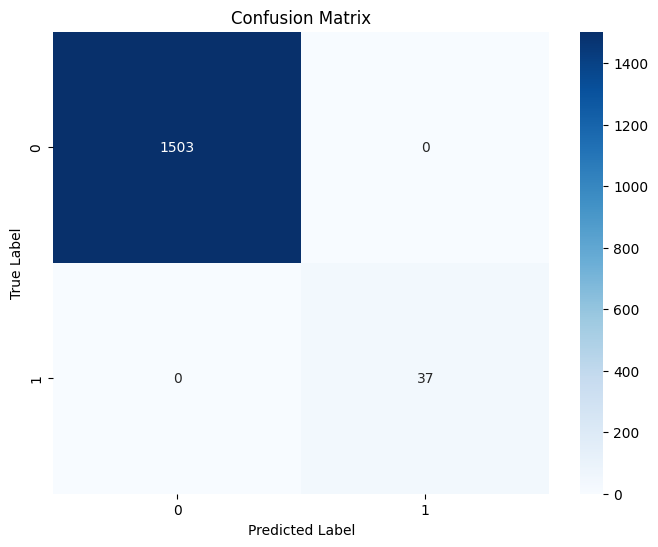

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1503
        True       1.00      1.00      1.00        37

    accuracy                           1.00      1540
   macro avg       1.00      1.00      1.00      1540
weighted avg       1.00      1.00      1.00      1540



In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(x_train_s, y_train)
dt_model.score(x_test_s, y_test)

1.0

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_s, y_train)
rf_model.score(x_test_s, y_test)

1.0

In [43]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=5)
xgb_model.fit(x_train_s, y_train)
xgb_model.score(x_test_s, y_test)

1.0

In [44]:
y_pred = xgb_model.predict(x_test_s)
print(confusion_matrix(y_test, y_pred))

[[1503    0]
 [   0   37]]


In [45]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=3)
lgbm_model.fit(x_train_s, y_train)
lgbm_model.score(x_test_s, y_test)

[LightGBM] [Info] Number of positive: 148, number of negative: 6010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 6158, number of used features: 89
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024034 -> initscore=-3.703968
[LightGBM] [Info] Start training from score -3.703968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


1.0

In [46]:
y_pred = lgbm_model.predict(x_test_s)
print(confusion_matrix(y_test, y_pred))

[[1503    0]
 [   0   37]]


In [47]:
# 연습 데이터
x_data = np.array([1.6, 2.3, 3.5, 4.6]).reshape(-1,1)
y_data = np.array([3.3, 5.5, 7.2, 9.9])

In [48]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_data, y_data)
lr_model.score(x_data, y_data)
lr_model.predict([[5]])

array([10.64610266])

<br>

## 딥러닝 모델링

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(x_train_s, y_train, epochs=10,  validation_split=0.2,
                    batch_size=10, callbacks=[es, mc]).history

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.9810 - loss: 0.0882 - val_acc: 0.9968 - val_loss: 0.0122
Epoch 2/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9979 - loss: 0.0111 - val_acc: 0.9959 - val_loss: 0.0406
Epoch 3/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9954 - loss: 0.0344 - val_acc: 0.9976 - val_loss: 0.0293
Epoch 4/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9979 - loss: 0.0114 - val_acc: 0.9992 - val_loss: 0.0277


In [50]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.summary()

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(x_train_s, y_train_encoded, epochs=10, validation_split=0.2,
                    batch_size=10, callbacks=[es, mc]).history

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,898 (42.57 KB)

 Trainable params: 10,898 (42.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9877 - loss: 0.0893 - val_acc: 0.9984 - val_loss: 0.0155
Epoch 2/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9954 - loss: 0.0403 - val_acc: 0.9984 - val_loss: 0.0027
Epoch 3/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9958 - loss: 0.0101 - val_acc: 0.9984 - val_loss: 0.0129
Epoch 4/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9943 - loss: 0.0438 - val_acc: 0.9984 - val_loss: 0.0069
Epoch 5/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9970 - loss: 0.0099 - val_acc: 1.0000 - val_loss: 3.0446e-05
Epoch 6/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9960 - loss: 0.0284 - val_acc: 0.9992 - val_loss: 0.8312
Epoch 7/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9951 - loss: 0.0541 - val_acc: 0.9984 - val_loss: 0.5003
Epoch 8/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9964 - loss: 0.0082 - val_acc: 0.9992 - val_loss: 0.5918


In [51]:
# 참고
# Y 레이블 One-Hot-Encoding 되지 않았으면 loss='sparse_categorical_crossentropy' 사용
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[es,mc], validation_data=(X_test, y_test), verbose=1)

In [52]:
# print(confusion_matrix(y_test_classes, pred_classes))
# print(classification_report(y_test_classes, pred_classes))

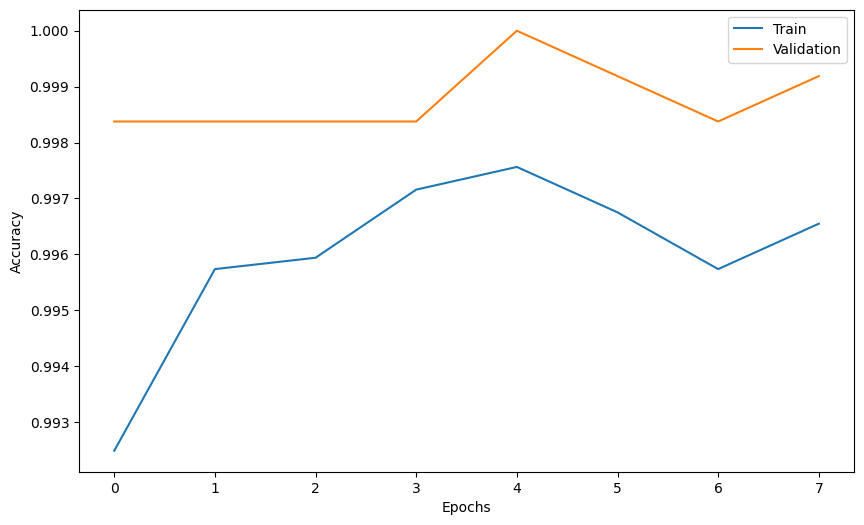

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(history['acc'], label='Train')
plt.plot(history['val_acc'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

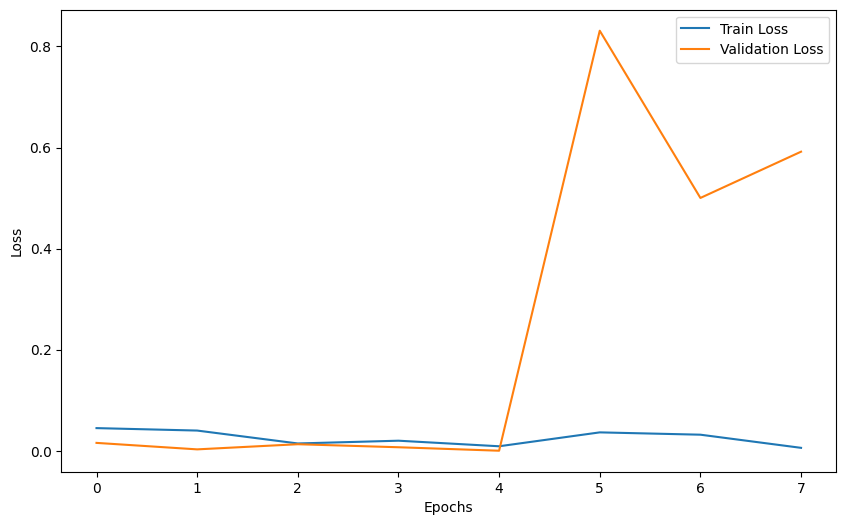

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
y_test_pred = np.argmax(model.predict(x_test_s), axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

accuracy = accuracy_score(y_test_classes, y_test_pred)
print("Accuracy:", accuracy)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy: 0.9961038961038962
